In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
housing = pd.read_csv("D:\Documents\Tugas BINUS\Semester 4\Machine Learning\Projek\housing.csv")
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [4]:
labelencoder = LabelEncoder()

housing['ocean_proximity'] = labelencoder.fit_transform(housing["ocean_proximity"])
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [5]:
for col in housing.columns:
  pct_missing = np.mean(housing[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

longitude - 0%
latitude - 0%
housing_median_age - 0%
total_rooms - 0%
total_bedrooms - 1%
population - 0%
households - 0%
median_income - 0%
median_house_value - 0%
ocean_proximity - 0%


In [6]:
ft_data = housing

imputer =SimpleImputer(strategy='median')
imputer.fit(ft_data)
X = imputer.transform(ft_data)
ft_transformed = pd.DataFrame(X,columns=ft_data.columns)

for col in ft_transformed.columns:
  pct_missing = np.mean(ft_transformed[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

longitude - 0%
latitude - 0%
housing_median_age - 0%
total_rooms - 0%
total_bedrooms - 0%
population - 0%
households - 0%
median_income - 0%
median_house_value - 0%
ocean_proximity - 0%


In [8]:
y = ft_transformed['median_house_value']
x = ft_transformed.drop('median_house_value', axis=1)

print (x.head())
print (y.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  ocean_proximity  
0       322.0       126.0         8.3252              3.0  
1      2401.0      1138.0         8.3014              3.0  
2       496.0       177.0         7.2574              3.0  
3       558.0       219.0         5.6431              3.0  
4       565.0       259.0         3.8462              3.0  
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

print("Training Set-X: ", x_train.shape)
print(x_train)
print()
print("Training Set-Y: ", y_train.shape)
print(y_train)

Training Set-X:  (16512, 9)
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  hous

In [10]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression().fit(x_train,y_train)

y_predict = linearmodel.predict(x_test)

lr_result= pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
print(lr_result)

         Actual      Predicted
20046   47700.0   63642.875628
3024    45800.0  154445.824842
15663  500001.0  252777.761321
20484  218600.0  263796.864355
9814   278000.0  266307.356346
...         ...            ...
15362  263300.0  207896.788258
16623  266800.0  251889.443159
18086  500001.0  439690.112774
2144    72300.0  130408.051819
3665   151500.0  175513.567555

[4128 rows x 2 columns]


In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('Linear Regression')
linearmodel_score = linearmodel.score(x_test, y_test)*100
print("Accuracy=", linearmodel_score)
print('Mean Absolute Error=',mean_absolute_error(y_predict,y_test))
print('Mean Squared Error=', mean_squared_error(y_predict,y_test))
linearmodel_rmse = np.sqrt(mean_squared_error(y_predict,y_test))
print('Root Mean Squared Error=', linearmodel_rmse)

Linear_reg = ('Linear Regression', linearmodel_score, linearmodel_rmse)

Linear Regression
Accuracy= 61.3706888649955
Mean Absolute Error= 51820.74815026209
Mean Squared Error= 5062019613.457106
Root Mean Squared Error= 71147.87146118362


In [12]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [13]:
y_pred_rfr = random_forest_regressor.predict(x_test)

rfr_result= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rfr})
print(rfr_result)


         Actual  Predicted
20046   47700.0   52827.00
3024    45800.0   64959.00
15663  500001.0  466150.44
20484  218600.0  257021.00
9814   278000.0  241047.01
...         ...        ...
15362  263300.0  222916.00
16623  266800.0  244025.00
18086  500001.0  498194.97
2144    72300.0   70388.00
3665   151500.0  177181.00

[4128 rows x 2 columns]


In [14]:
print('Random Forest Regression')
Randomforest_score = random_forest_regressor.score(x_test,y_test)*100
print("Accuracy=", Randomforest_score)
print('Mean Absolute Error=',mean_absolute_error(y_pred_rfr,y_test))
print('Mean Squared Error=', mean_squared_error(y_pred_rfr,y_test))
Randomforest_rmse = np.sqrt(mean_squared_error(y_pred_rfr,y_test))
print('Root Mean Squared Error=', Randomforest_rmse)

Randomforest_reg = ('Random Forest Regression', Randomforest_score, Randomforest_rmse)

Random Forest Regression
Accuracy= 80.93579216714657
Mean Absolute Error= 32028.607548449614
Mean Squared Error= 2498190910.7221613
Root Mean Squared Error= 49981.9058332329


In [15]:
from sklearn.linear_model import LassoCV
from numpy import arange

lasso_model = LassoCV(alphas=arange(0, 1, 0.01), n_jobs=-1, tol=0.08,random_state=42, max_iter=10000)

lasso_model.fit(x_train,y_train)

C:\Users\Julian Andhika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Julian Andhika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Julian Andhika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Julian Andhika\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        max_iter=10000, n_jobs=-1, random_state=42, tol=0.08)

In [16]:
y_pred_lasso = lasso_model.predict(x_test)

lasso_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lasso})
print(lasso_result)

         Actual      Predicted
20046   47700.0   63645.610553
3024    45800.0  154445.312618
15663  500001.0  252780.819767
20484  218600.0  263794.667494
9814   278000.0  266304.564556
...         ...            ...
15362  263300.0  207896.192702
16623  266800.0  251885.161520
18086  500001.0  439686.250033
2144    72300.0  130411.420398
3665   151500.0  175512.009079

[4128 rows x 2 columns]


In [17]:
print('Lasso Model')
Lassomodel_score = lasso_model.score(x_test,y_test)*100
print("Accuracy=", Lassomodel_score)
print('Mean Absolute Error=',mean_absolute_error(y_pred_lasso,y_test))
print('Mean Squared Error=', mean_squared_error(y_pred_lasso,y_test))
Lassomodel_rmse = np.sqrt(mean_squared_error(y_pred_lasso,y_test))
print('Root Mean Squared Error=', Lassomodel_rmse)

Lassomodel_reg = ('Lasso Model', Lassomodel_score, Lassomodel_rmse)

Lasso Model
Accuracy= 61.37082463297246
Mean Absolute Error= 51820.644583282214
Mean Squared Error= 5062001822.29951
Root Mean Squared Error= 71147.74643162993


In [18]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)

In [19]:
print('Decision Tree')
Decisiontree_score = decision_tree.score(x_test,y_test)*100
print("Accuracy=", Decisiontree_score)
print('Mean Absolute Error=',mean_absolute_error(decision_tree_pred,y_test))
print('Mean Squared Error=', mean_squared_error(decision_tree_pred,y_test))
Decisiontree_rmse = np.sqrt(mean_squared_error(decision_tree_pred,y_test))
print('Root Mean Squared Error=', Decisiontree_rmse)

Decisiontree_reg = ('Decision Tree',Decisiontree_score ,Decisiontree_rmse)

Decision Tree
Accuracy= 64.67805585769392
Mean Absolute Error= 43504.18677325582
Mean Squared Error= 4628619273.300145
Root Mean Squared Error= 68033.95676645703


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [21]:
random_forest_regressor_random = RandomizedSearchCV(estimator = random_forest_regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

random_forest_regressor_random.fit(x_train, y_train)

random_forest_regressor_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [22]:
random_forest_tuned2= RandomForestRegressor (n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt',max_depth=None, bootstrap=False)
random_forest_tuned2.fit(x_train,y_train)
random_forest_tuned2_pred = random_forest_tuned2.predict(x_test)

In [23]:
print('Random Forest Tree Tuned')
RandomForestTuned_score = random_forest_tuned2.score(x_test,y_test)*100
print("Accuracy=", RandomForestTuned_score)
print('Mean Absolute Error=',mean_absolute_error(random_forest_tuned2_pred,y_test))
print('Mean Squared Error=', mean_squared_error(random_forest_tuned2_pred,y_test))
RandomForestTuned_rmse = np.sqrt(mean_squared_error(random_forest_tuned2_pred,y_test))
print('Root Mean Squared Error=', RandomForestTuned_rmse)

RandomForestTuned_reg = ('Random Forest Tuned', RandomForestTuned_score, RandomForestTuned_rmse)

Random Forest Tree Tuned
Accuracy= 82.22577495579976
Mean Absolute Error= 31238.69969597868
Mean Squared Error= 2329150407.919425
Root Mean Squared Error= 48261.27234045353


In [24]:
df_results = pd.DataFrame([Linear_reg, Randomforest_reg, Lassomodel_reg, Decisiontree_reg, RandomForestTuned_reg], columns=['Model', 'Accuracy','RMSE'])
df_results.sort_values('Accuracy',ascending=False)

,Model,Accuracy,RMSE
4,Random Forest Tuned,82.225775,48261.272340
1,Random Forest Regression,80.935792,49981.905833
3,Decision Tree,64.678056,68033.956766
2,Lasso Model,61.370825,71147.746432
0,Linear Regression,61.370689,71147.871461


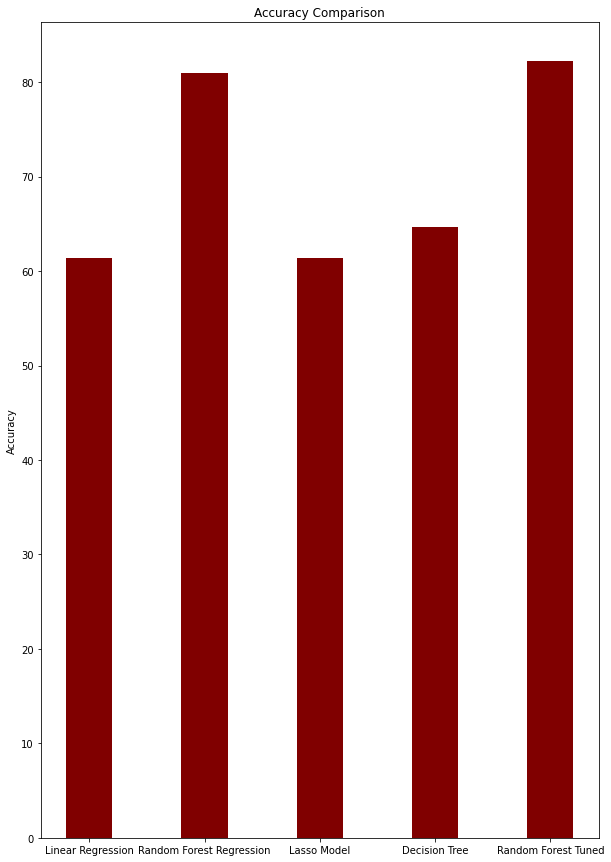

In [26]:
import matplotlib.pyplot as plt

Accuracy = {'Linear Model':Linear_reg, 'Random Forest Model':Randomforest_reg, 'Lasso Model':Lassomodel_reg, 'Decision Tree Model':Decisiontree_reg, 'Random Forest Tuned Model':RandomForestTuned_reg}

model = df_results['Model']
accuracy = df_results['Accuracy']
  
fig = plt.figure(figsize = (10, 15))
 
# creating the bar plot
plt.bar(model, accuracy, color ='maroon',
        width = 0.4)
 
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

In [27]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': random_forest_tuned2_pred})
print(df_comparison)

         Actual    Predicted
20046   47700.0   49361.0000
3024    45800.0   70879.5000
15663  500001.0  443564.1500
20484  218600.0  258744.5275
9814   278000.0  267056.5050
...         ...          ...
15362  263300.0  240615.0000
16623  266800.0  234564.2500
18086  500001.0  479529.2850
2144    72300.0   70357.5000
3665   151500.0  175271.2500

[4128 rows x 2 columns]


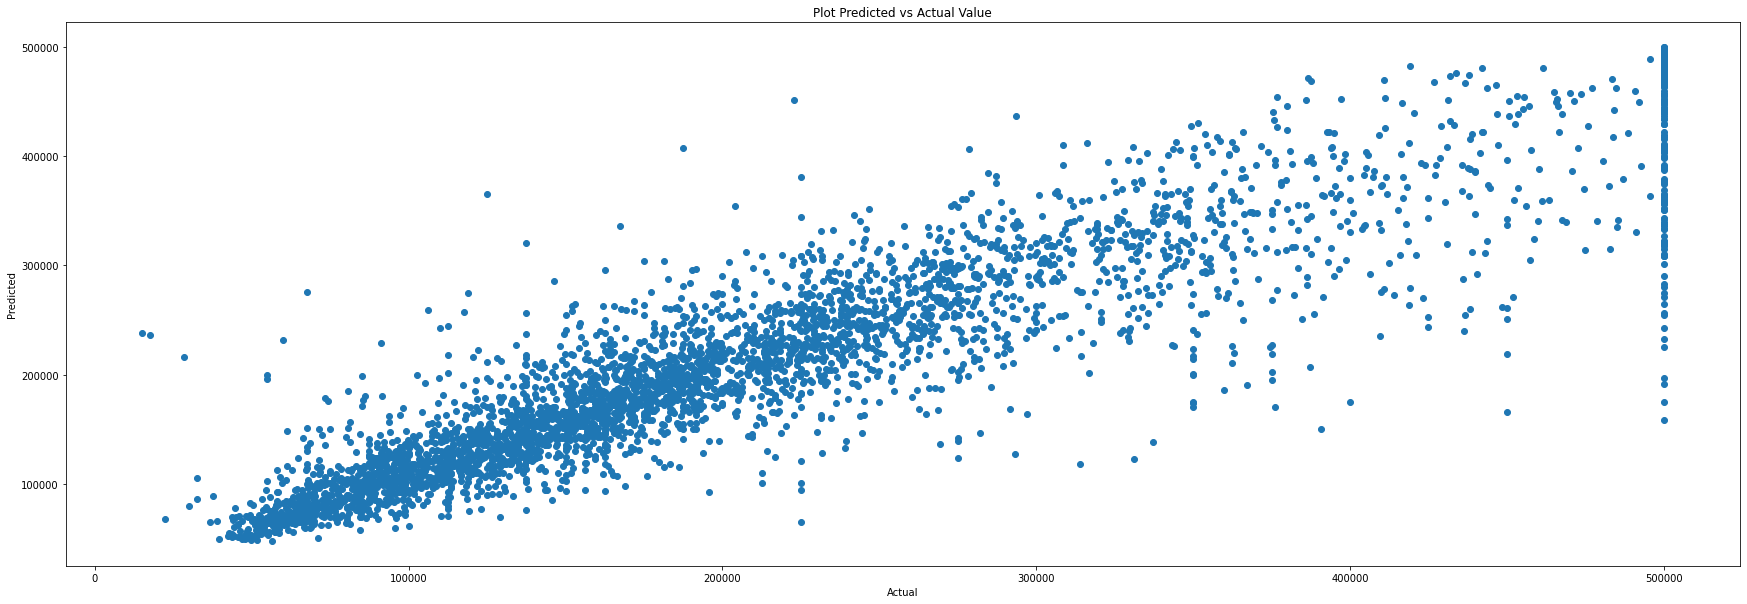

In [28]:
plt.figure(figsize=(30,10))
plt.scatter(x='Actual',y='Predicted', data=df_comparison)
plt.title('Plot Predicted vs Actual Value')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()